In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [2]:
train_file_path = r"D:\Energy Efficiency ML\Energy-Efficiency-ML-Project\energyefficiency\artifact\data_ingestion\2022-07-08_23-42-58\ingested_data\train\ENB2012_data.xlsx"

In [3]:
df1 = pd.read_excel(train_file_path)

In [4]:
df1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.66,759.5,318.5,220.5,3.5,5,0.25,1,13.18,16.19
1,0.62,808.5,367.5,220.5,3.5,5,0.10,4,13.00,14.47
2,0.82,612.5,318.5,147.0,7.0,5,0.25,2,24.94,29.88
3,0.62,808.5,367.5,220.5,3.5,3,0.25,5,13.99,14.61
4,0.66,759.5,318.5,220.5,3.5,2,0.10,4,11.44,14.86


In [5]:
df1.shape

(614, 10)

In [6]:
df1[["Heating Load","Cooling Load"]]

,Heating Load,Cooling Load
0,13.18,16.19
1,13.00,14.47
2,24.94,29.88
3,13.99,14.61
4,11.44,14.86
...,...,...
609,11.22,14.44
610,16.90,16.79
611,24.58,26.47
612,12.19,14.71


In [7]:
X,y = df1.drop(columns=["Heating Load","Cooling Load"]),df1[["Heating Load","Cooling Load"]]

In [8]:
X

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.66,759.5,318.5,220.50,3.5,5,0.25,1
1,0.62,808.5,367.5,220.50,3.5,5,0.10,4
2,0.82,612.5,318.5,147.00,7.0,5,0.25,2
3,0.62,808.5,367.5,220.50,3.5,3,0.25,5
4,0.66,759.5,318.5,220.50,3.5,2,0.10,4
...,...,...,...,...,...,...,...,...
609,0.69,735.0,294.0,220.50,3.5,2,0.10,3
610,0.62,808.5,367.5,220.50,3.5,3,0.40,4
611,0.98,514.5,294.0,110.25,7.0,2,0.10,1
612,0.71,710.5,269.5,220.50,3.5,3,0.25,5


In [9]:
y

,Heating Load,Cooling Load
0,13.18,16.19
1,13.00,14.47
2,24.94,29.88
3,13.99,14.61
4,11.44,14.86
...,...,...
609,11.22,14.44
610,16.90,16.79
611,24.58,26.47
612,12.19,14.71


In [10]:
X.shape

(614, 8)

In [11]:
y.shape

(614, 2)

##### Check for null or Nan values 

In [12]:
X.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
dtype: int64

In [13]:
y.isnull().sum()

Heating Load    0
Cooling Load    0
dtype: int64

In [14]:
for i in X.columns:
    X_unique_values = [i,list(X[i].unique())]
    print(X_unique_values)

['Relative Compactness', [0.66, 0.62, 0.82, 0.74, 0.71, 0.79, 0.76, 0.98, 0.69, 0.9, 0.86, 0.64]]
['Surface Area', [759.5, 808.5, 612.5, 686.0, 710.5, 637.0, 661.5, 514.5, 735.0, 563.5, 588.0, 784.0]]
['Wall Area', [318.5, 367.5, 245.0, 269.5, 343.0, 416.5, 294.0]]
['Roof Area', [220.5, 147.0, 122.5, 110.25]]
['Overall Height', [3.5, 7.0]]
['Orientation', [5, 3, 2, 4]]
['Glazing Area', [0.25, 0.1, 0.4, 0.0]]
['Glazing Area Distribution', [1, 4, 2, 5, 3, 0]]


In [15]:
for i in y.columns:
    y_unique_values = [i,list(y[i].unique())]
    print(y_unique_values)

['Heating Load', [13.18, 13.0, 24.94, 13.99, 11.44, 14.54, 10.14, 12.36, 12.63, 14.22, 16.77, 39.97, 39.83, 11.33, 32.31, 14.52, 35.94, 32.75, 13.01, 11.22, 32.29, 34.24, 29.71, 36.45, 12.77, 23.8, 39.01, 16.55, 28.67, 6.01, 31.29, 10.8, 29.08, 34.72, 26.33, 19.13, 24.63, 14.5, 15.29, 14.1, 14.9, 35.65, 12.12, 8.45, 19.12, 13.94, 31.84, 15.34, 32.21, 12.95, 17.14, 28.61, 28.83, 12.16, 12.86, 33.27, 14.6, 13.17, 32.82, 41.3, 10.55, 12.74, 14.7, 25.17, 36.59, 28.57, 6.07, 32.73, 38.84, 12.73, 35.56, 29.4, 24.31, 36.91, 14.34, 17.11, 12.65, 38.57, 16.93, 36.28, 32.74, 28.01, 12.35, 40.15, 11.16, 11.34, 16.62, 10.34, 11.98, 32.72, 32.67, 29.87, 10.71, 36.06, 10.78, 10.46, 39.31, 35.64, 12.88, 16.83, 12.32, 11.43, 28.15, 39.81, 12.72, 12.27, 17.26, 23.54, 11.42, 17.88, 24.6, 18.48, 10.7, 12.93, 12.8, 14.41, 28.07, 15.23, 40.0, 12.29, 16.74, 12.43, 31.53, 10.72, 14.96, 11.45, 33.08, 36.57, 19.5, 29.53, 12.45, 40.78, 18.31, 15.09, 12.92, 7.1, 29.14, 17.5, 15.16, 14.92, 14.47, 36.26, 42.49, 24

<AxesSubplot:>

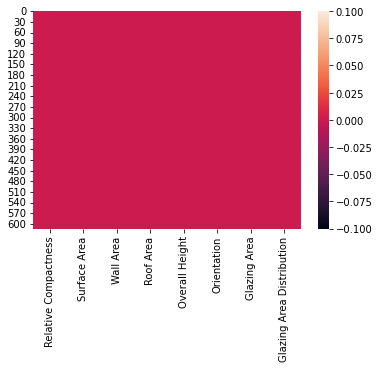

In [16]:
sns.heatmap(X.isnull())

<AxesSubplot:>

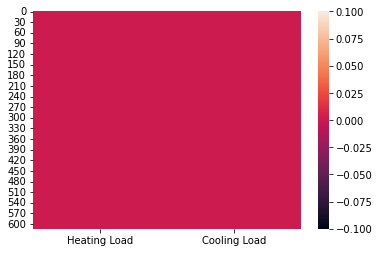

In [17]:
sns.heatmap(y.isnull())

##### Observation: There are no Null or NaN Values in both X, y

#### Checking for Outliers

In [18]:
X.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution'],
      dtype='object')

In [19]:
X.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.764007,671.714984,317.023616,177.345684,5.215798,3.482085,0.231270,2.793160
std,0.105019,87.255621,44.461008,45.258007,1.751092,1.124619,0.132393,1.556301
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.690000,612.500000,294.000000,147.000000,3.500000,2.000000,0.100000,1.000000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.000000,0.250000,3.000000
75%,0.820000,735.000000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


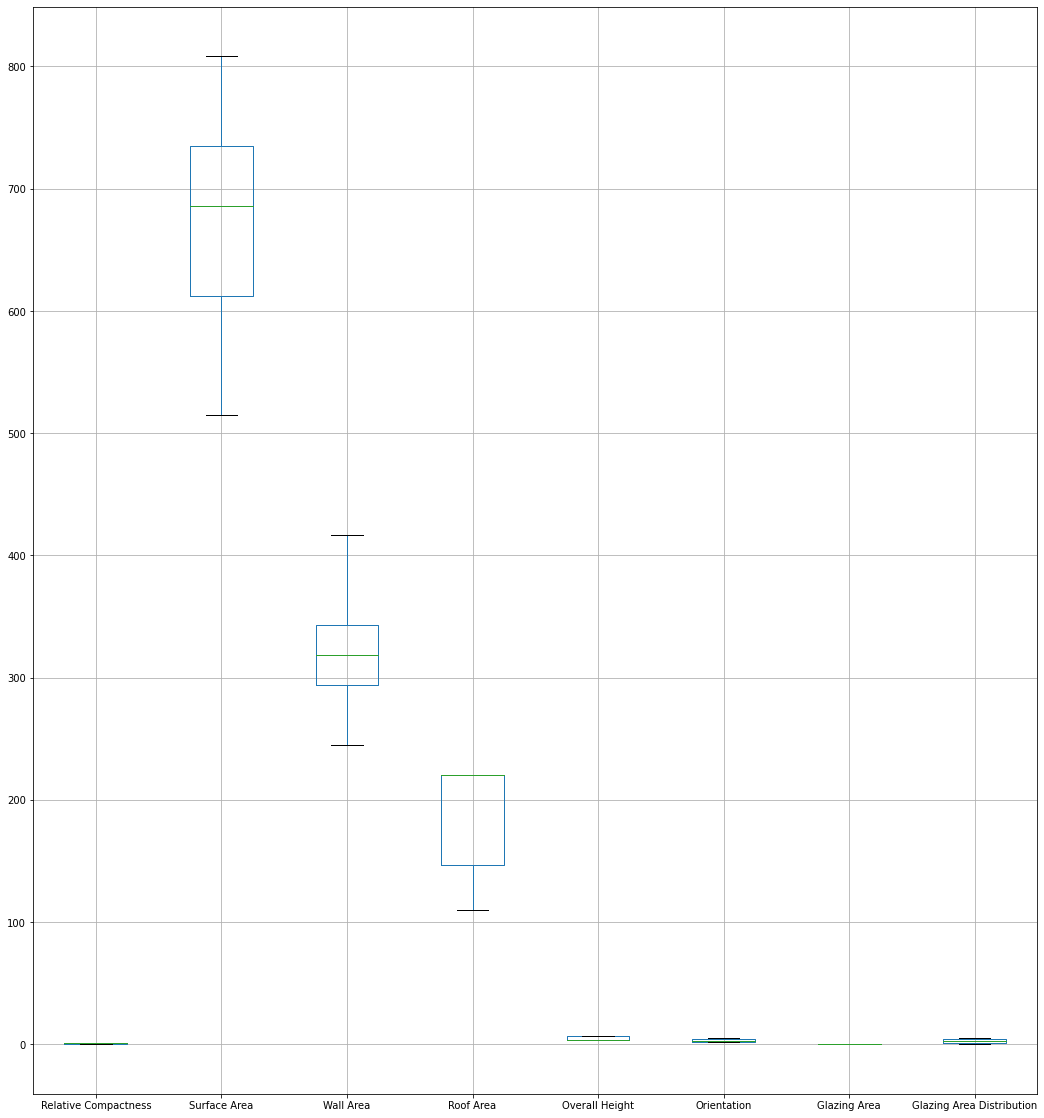

In [20]:
plt.figure(figsize=(18,20))
X.boxplot()
plt.show()

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Relative Compactness'>

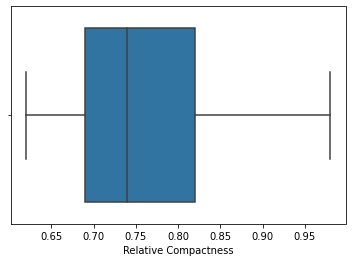

In [21]:
sns.boxplot(X['Relative Compactness'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Surface Area'>

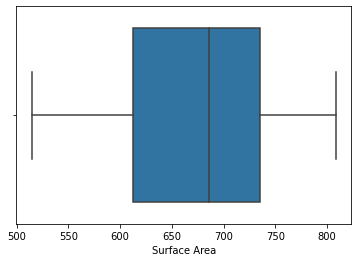

In [22]:
sns.boxplot(X['Surface Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Wall Area'>

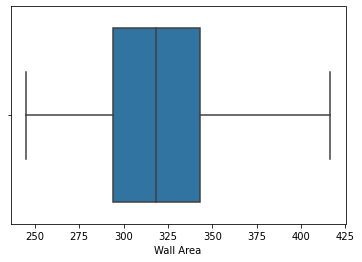

In [23]:
sns.boxplot(X['Wall Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Roof Area'>

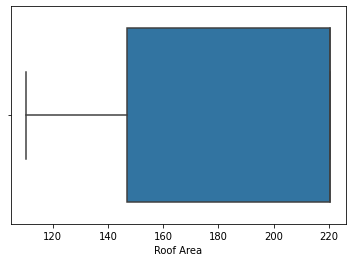

In [24]:
sns.boxplot(X['Roof Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Overall Height'>

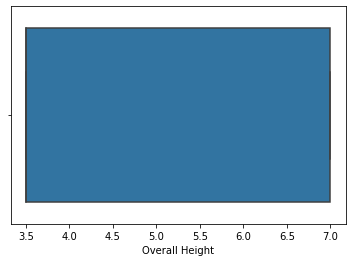

In [25]:
sns.boxplot(X['Overall Height'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Orientation'>

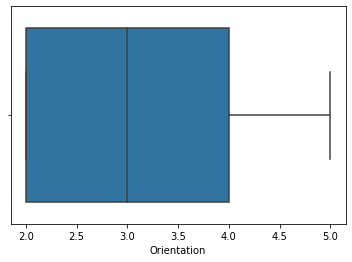

In [26]:
sns.boxplot(X['Orientation'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Glazing Area'>

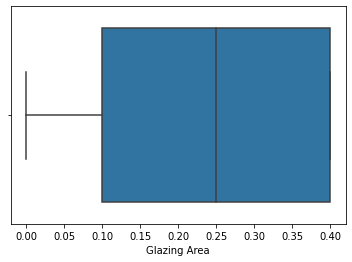

In [27]:
sns.boxplot(X['Glazing Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Glazing Area Distribution'>

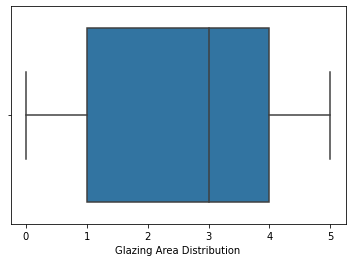

In [28]:
sns.boxplot(X['Glazing Area Distribution'])

In [29]:
y.columns

Index(['Heating Load', 'Cooling Load'], dtype='object')

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Heating Load'>

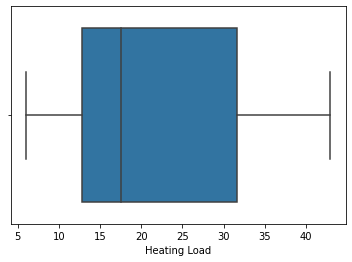

In [30]:
sns.boxplot(y['Heating Load'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cooling Load'>

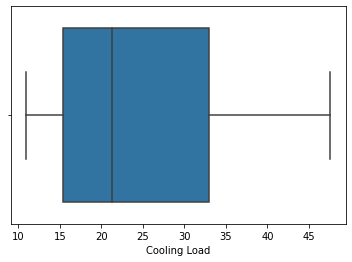

In [31]:
sns.boxplot(y['Cooling Load'])

##### Observation: From the above Box Plots we can derive the conclusion that there are no outliers in our train dataset X, y

##### Checking the relationship of independent features with output Heating and Cooling load, also the correlation between the independent features

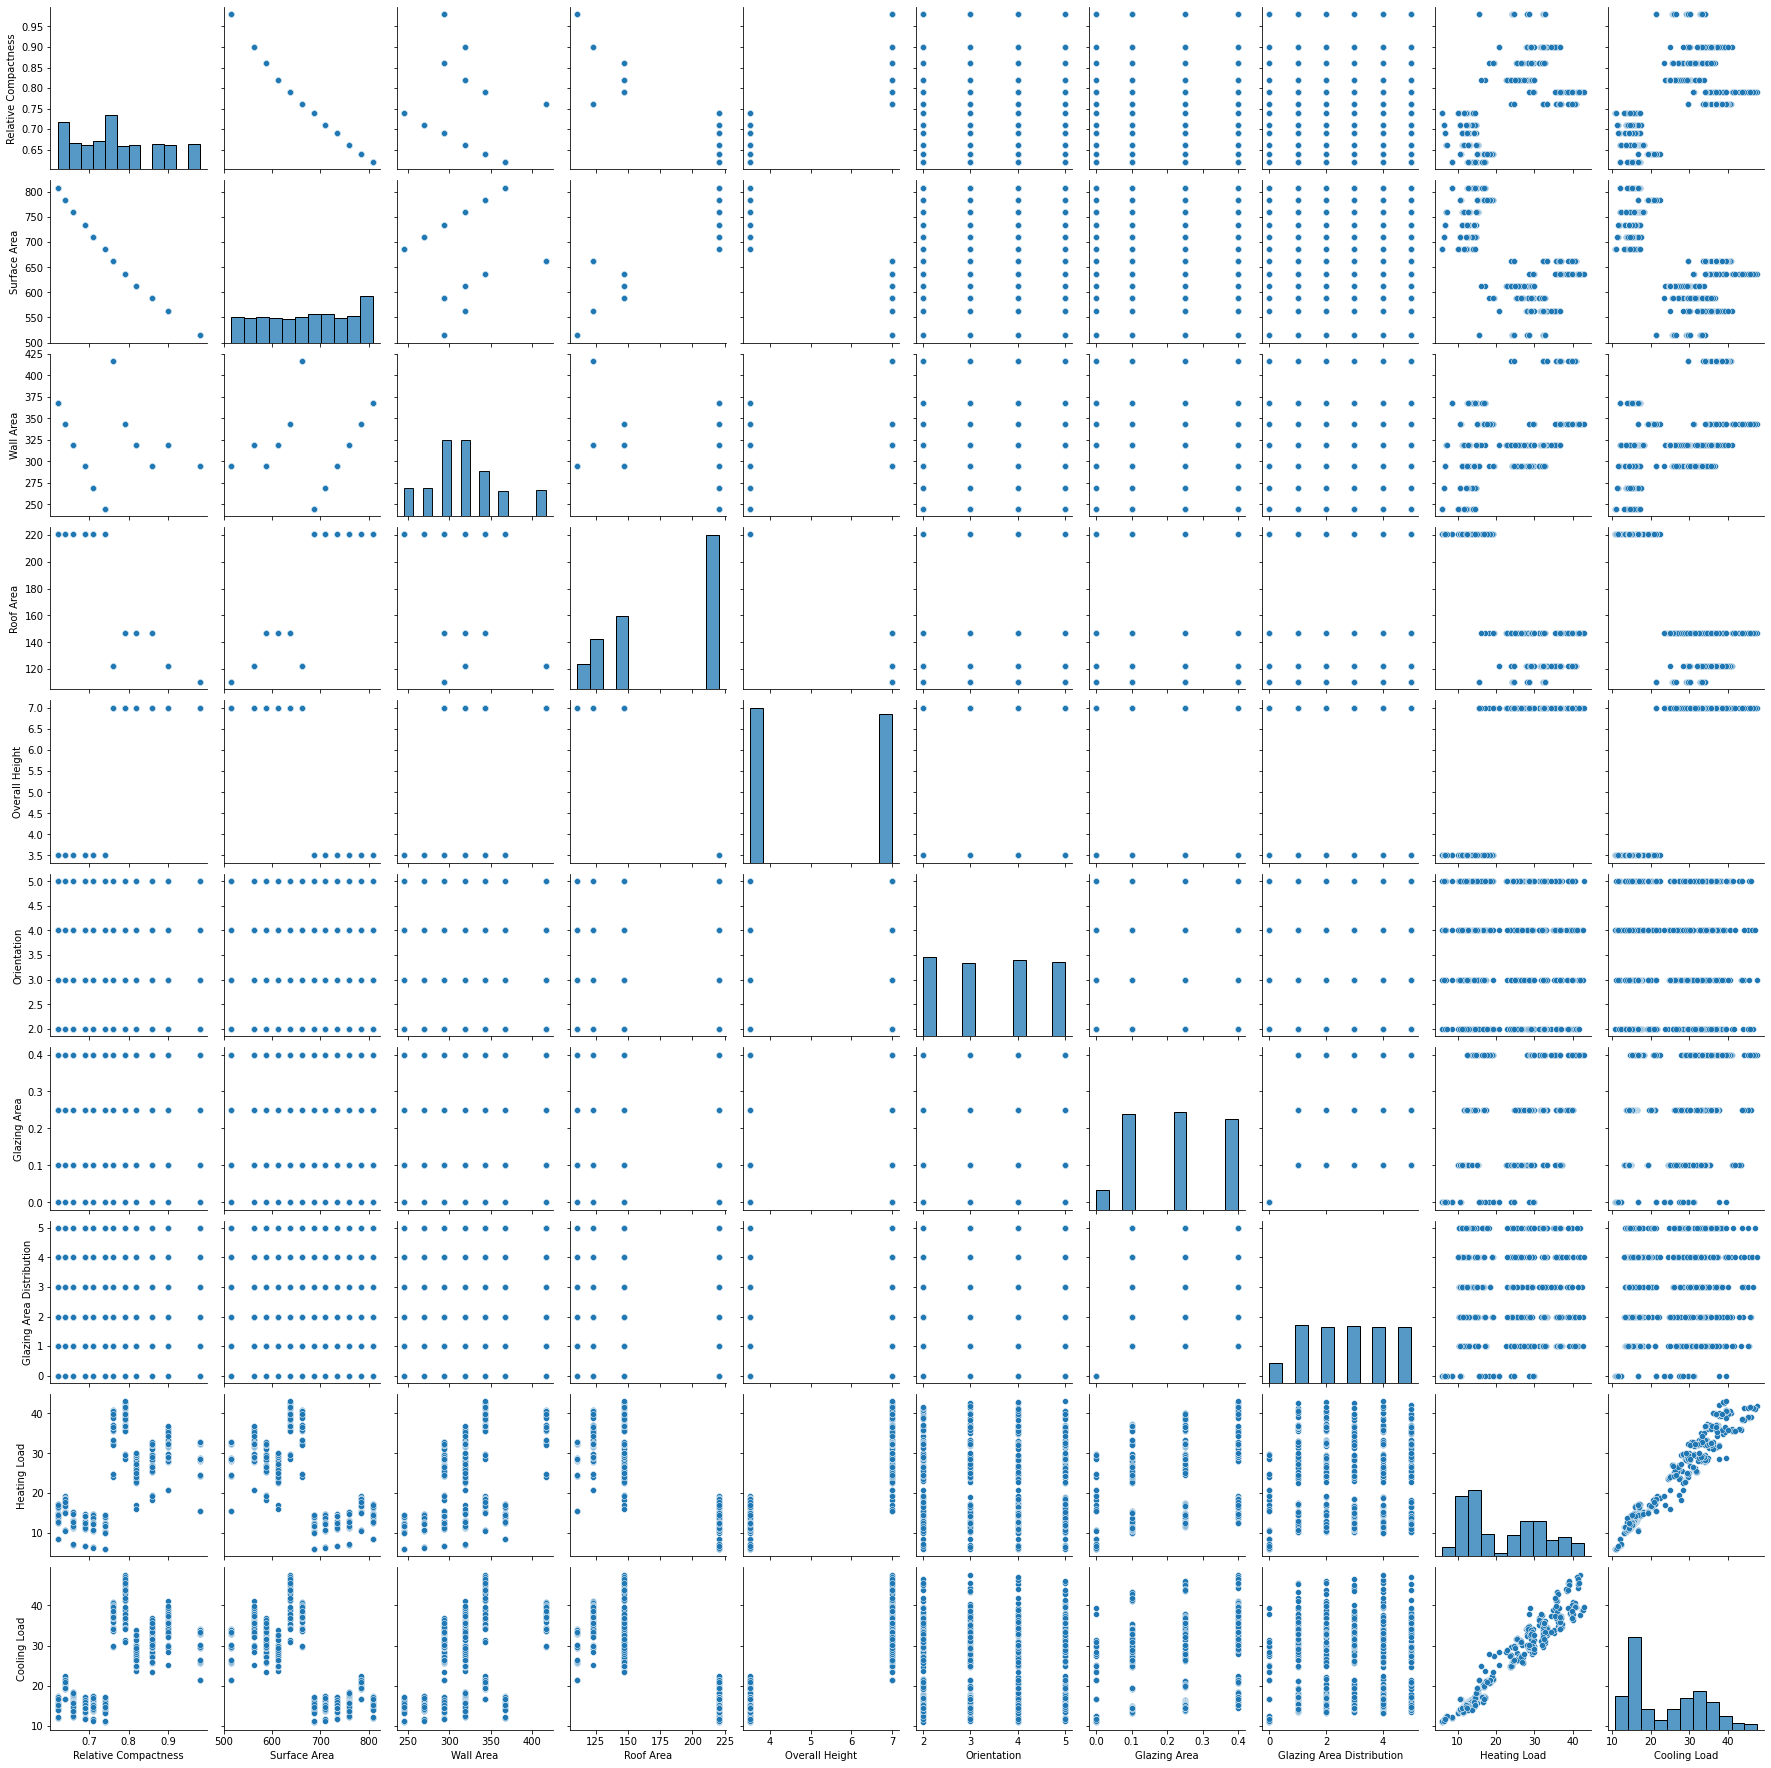

In [32]:
sns.pairplot(df1)

<AxesSubplot:>

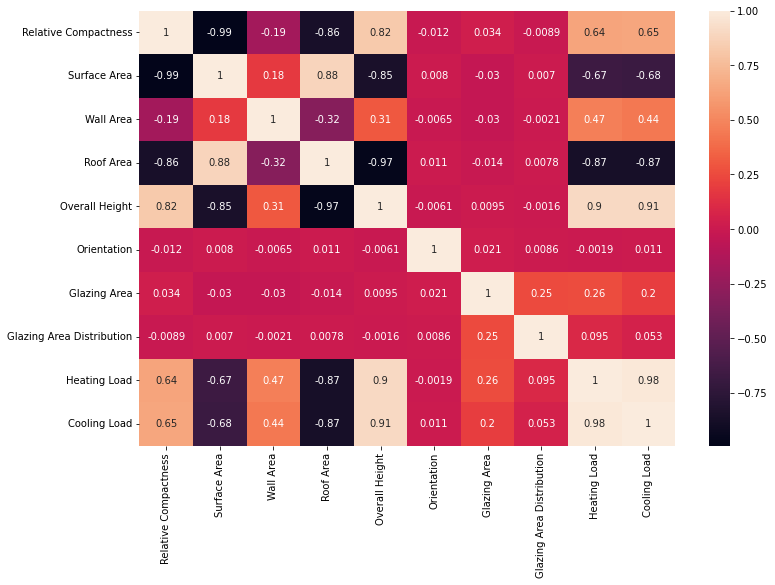

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df1.corr(),annot=True)

Observation:
1. From the above heatmap it is evident that Relative Compactness and Surface Area have negative correlation of 0.99
2. The Output Features Heating and Cooling Load is also having a correlation of 0.98
3. No other features have correlation more than 0.95
4. Hence, as the dataset is very small we will not drop any of the columns (Relative Compactness and Surface Area)

##### In case of any Null or Nan Values that comes in a new dataset we need to care of them so using simple imputer in such cases to overcome the issue of missing values

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
### For numerical Values

simple_imputer_num = SimpleImputer(strategy="median") # In case we have outliers


In [39]:
simple_imputer_num_2 = SimpleImputer(strategy="mean")

In [40]:
### For categorical features

simple_imputer_cat = SimpleImputer(strategy="most_frequent")

##### Respective fit_transform needs to be carried out for the numerical and categorical features to get rid of missing values

##### Custom Transformer

In [45]:
class FeatureGenerator():

    def __init__(self,strategy="median"):
        self.strategy = strategy

    def fit(self,A):
        self.features = A.columns
        self.statistic_ = []
        for column in A.columns:
            self.statistic_.append(A[column].median())
        return self

    def transform(self,A:pd.DataFrame):
        for idx,column in enumerate(A.columns):
            A[column].fillna(self.statistic_[idx])
        return X 

    def fit_transform(self,A):
        self.fit(A)
        return self.transform(A)

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
class FeatureGenerator(BaseEstimator,TransformerMixin):

    def __init__(self,strategy="median"):
        self.strategy = strategy

    def fit(self,A):
        self.features = A.columns
        self.statistic_ = []
        for column in A.columns:
            self.statistic_.append(A[column].median())
        return self

    def transform(self,A:pd.DataFrame):
        for idx,column in enumerate(A.columns):
            A[column].fillna(self.statistic_[idx])
        return X 

        ## With TransformerMixin inherited we need not write fit_transform as it is taken care by the TransformerMixin